# Najboljše videoigre vseh časov

 **Projektna naloga pri predmetu Programiranje 1**

# 0. Priprava podatkov

Preden sploh lahko začnemo z analizo podatkov, moramo seveda pripraviti vse potrebno. V ta namen uvozimo knjižnico pandas in vnesemo naše tabele.

In [1]:
import pandas as pd

pd.options.display.max_rows = 30

%matplotlib inline

igre = pd.read_csv("igre.csv")
zanri = pd.read_csv("zanri.csv")

In [2]:
igre

,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis
0,160692,The Legend of Zelda: Ocarina of Time,Nintendo 64,Nintendo,Nov,1998,99.0,22.0,9.1,5723.0,E,1.0,"As a young boy, Link is tricked by Ganondorf, ..."
1,160779,Tony Hawk's Pro Skater 2,PlayStation,Activision,Sep,2000,98.0,19.0,7.4,639.0,T,2.0,As most major publishers' development efforts ...
2,108362,Grand Theft Auto IV,PlayStation 3,Rockstar Games,Apr,2008,98.0,64.0,7.6,3797.0,M,1.0,What does the American Dream mean today? For N...
3,160751,SoulCalibur,Dreamcast,Namco,Sep,1999,98.0,24.0,8.5,321.0,T,2.0,"This is a tale of souls and swords, transcendi..."
4,108363,Grand Theft Auto IV,Xbox 360,Rockstar Games,Apr,2008,98.0,86.0,7.9,3360.0,M,1.0,What does the American Dream mean today? For N...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,215521,Atelier Ayesha: The Alchemist of Dusk,PlayStation 3,Koei Tecmo Games,Mar,2013,70.0,17.0,7.7,88.0,T,1.0,Atelier Ayesha: The Alchemist of Dusk follows ...
9996,182135,Payday: The Heist,PlayStation 3,Sony Online Entertainment,Oct,2011,70.0,30.0,6.4,83.0,M,NaN,Players will embark on a spectacular crime spr...
9997,182132,The Sims 3: Pets,PlayStation 3,Electronic Arts,Oct,2011,70.0,16.0,3.9,15.0,T,1.0,Players take creativity by the reins and play ...
9998,110061,Global Agenda,PC,Hi-Rez Studios,Feb,2010,70.0,16.0,7.8,356.0,T,NaN,Global Agenda is a massively multi-player acti...


In [3]:
zanri

,id,zanr
0,160692,Action Adventure
1,160692,Fantasy
2,160779,Sports
3,160779,Alternative
4,160779,Skateboarding
...,...,...
34181,110061,Massively Multiplayer Online
34182,110061,Massively Multiplayer
34183,110061,Sci-Fi
34184,502606,Action Adventure


# 1. Kaj pomeni "najboljša videoigra"?

Da bo naslov te projektne naloge upravičen, bi se spodobilo, da najprej dorečemo, kaj sploh pomeni, da je igra "najboljša". Igre so na spletni strani Metacritic, s katere sem prenesel podatke, razvrščene po oceni **metascore**. Tu jih bomo ocenjevali malo drugače.

Konstruirali bomo lastno metriko za rangiranje. Bralec se morda sprašujemo zakaj je to potrebno. Razlogov je več:
* Neobelani podatki so razvrščeni po **metascore**, torej ocenah strokovnjakov. Ne upoštevamo mnenja običajnega igralca.
* Nikjer ne upoštevamo števila ocen, kar lahko pripelje do patoloških primerov. Igra, ki ima 5 glasov in oceno 9.0, intuitivno seveda ni enako dobra kot igra, ki ima 5000 glasov in oceno 8.5.
* Do neke mere bi radi upoštevali, da je igra z malo glasovi in dobro oceno boljša od igre z veliko glasovi, ki pravijo, da je slaba.

Najprej malo preletimo podatke, da vidimo, s čim sploh imamo opravka.

##  Userscore

**Userscore** je ocena, ki jo dajo običajni uporabniki spletne strani. Poglejmo, kaj nam lahko pove.

<AxesSubplot:xlabel='glasovi userscore', ylabel='userscore'>

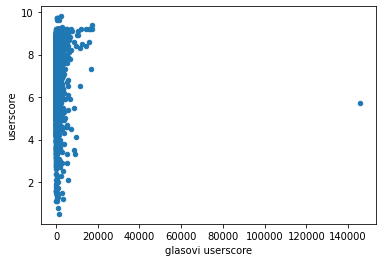

In [4]:
igre.plot.scatter(x="glasovi userscore", y="userscore")

In [5]:
igre[igre["glasovi userscore"] > 10 ** 5]

,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis
115,504733,The Last of Us Part II,PlayStation 4,SCEA,Jun,2020,93.0,121.0,5.7,145922.0,M,1.0,Five years after their dangerous journey acros...


V redu, zanimiv začetek ...

Za bralca, ki ni na tekočem s svetom videoiger, *The Last of Us* je bila ena najbolj uspešnih videoiger za *PlayStation 3* ter *PlayStation 4* in ena najbolj uspešnih videoiger nasploh. Je kanoničen primer, ko zagovarjaš, da igre niso samo streljačine, ampak celoten medij, ki se lahko ob rob postavi knjigi in filmu. Ko bomo iskali najboljše igre na teh platformah, bomo to gotovo našli med njimi.

Skratka, igra je izšla 2013 in oboževalci so čakali 7 let na njeno nadaljevanje, *The Last of Us Part II*, ki pa je bila dokaj kontroverzna. Oddaljila se je od sporočila prve igre in se usmerila v LGBT vsebine. To je skupaj z napihnjenimi pričakovanji občinstva pomenilo, da je veliko ljudi želelo izraziti svoje mnenje o igri. Ravno to lahko opazimo v zgornjem grafu.

Morda se sedaj osredotočimo na območje, kjer je glavnina podatkov.

<AxesSubplot:xlabel='glasovi userscore', ylabel='userscore'>

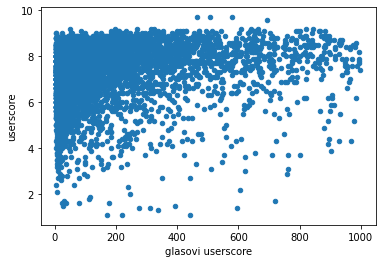

In [6]:
igre[igre["glasovi userscore"] < 1000].plot.scatter(x="glasovi userscore", y="userscore")

Vidimo, da več kot je glasov, boljše so igre. Torej je smiselno število glasov upoštevati pri naši oceni. Naredimo sledeče:

**Prilagojen userscore** izračunamo po naslednji formuli: `Up = U * (Gu / (Gu + GuAv))`,  
kjer je `U` prvotna ocena, `Gu` število glasov in `GuAv` povprečno število glasov.

S tem smo dosegli sledeče:
* Igre z visoko oceno in velikim številom glasov bodo obdržale prestižno oceno.
* Igre z nizko oceno in velikim številom glasov bodo ostale slabo ocenjene.
* Igre s sicer malo glasovi, ampak z res dobro oceno bodo povprečno ali celo nadpovprečno ocenjene.
* Za igre z nizko oceno in malo glasovi smatramo, da niso dovolj popularne, zato se njihova ocena zmanjša.

Če je glasov veliko, ocena ostane skoraj enaka. Če pa je glasov malo, se ocena temu primerno prilagodi, pri čimer pa lahko res dobra igra vseeno izstopa.
Tako smo graf ocene v odvisnosti od glasov nekoliko linealizirali.

In [7]:
def prilagodi_glasove_userscore(tabela_iger):
    def prilagodi(ocena, st_glasov, medijana_glasov):
        return round(((st_glasov) / (st_glasov + medijana_glasov)) * ocena, 2) 
    tabela_iger["prilagojen userscore"] = prilagodi(
        tabela_iger["userscore"], tabela_iger["glasovi userscore"], (tabela_iger["glasovi userscore"]).mean()
        )

prilagodi_glasove_userscore(igre)

<AxesSubplot:xlabel='glasovi userscore', ylabel='prilagojen userscore'>

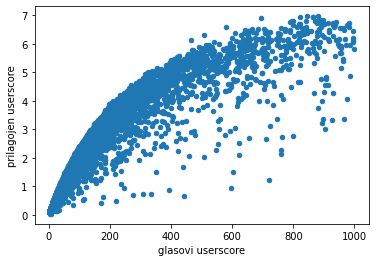

In [8]:
igre[igre["glasovi userscore"] < 1000].plot.scatter(x="glasovi userscore", y="prilagojen userscore")

## Metascore

<AxesSubplot:xlabel='glasovi metascore', ylabel='metascore'>

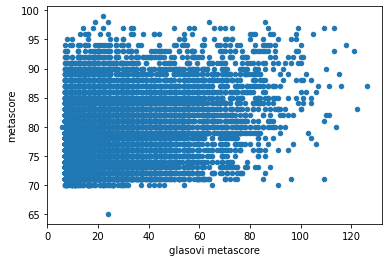

In [9]:
igre.plot.scatter(x="glasovi metascore", y="metascore")

Tu opazimo, da kvaliteta iger s številom glasov ne narašča. To je po pričakovanjih, saj proizvajalci pogosto podarijo igro ocenjevalcem, da jo ti ocenijo in s tem naredijo reklamo. Število glasov je torej v veliki meri odvisno od proizvajalca in ga zato tu ne bomo upoštevali. Poleg tega so števila glasov stokovnjakov veliko nižja v primerjavi s števili glasov uporabnikov, zato izračun po zgornji enačbi v tem primeru ne bi bil realen.

Oceno strokovnjakov bomo le delili z 10, da bosta userscore in metascore števili istega reda velikosti.  
Torej **prilagojen metascore** dobimo po formuli: `Mp = M / 10`, kjer je `M` metascore.

In [10]:
def prilagodi_glasove_metascore(tabela_iger):
    tabela_iger["prilagojen metascore"] = tabela_iger["metascore"] / 10

prilagodi_glasove_metascore(igre)

## Prilagojena ocena

Naša **prilagojena ocena** bo vsota prilagojenega metascora in prilagojenega userscora. In ko smo ravno pri tem, bomo še odstranili igre, ki niso ocenjene.

In [11]:
def prilagojena_ocena(tabela_iger):
    tabela_iger["prilagojena ocena"] = tabela_iger["prilagojen userscore"] + tabela_iger["prilagojen metascore"]
    tabela_iger.dropna(subset=["prilagojena ocena"], inplace=True)

prilagojena_ocena(igre)
igre

,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis,prilagojen userscore,prilagojen metascore,prilagojena ocena
0,160692,The Legend of Zelda: Ocarina of Time,Nintendo 64,Nintendo,Nov,1998,99.0,22.0,9.1,5723.0,E,1.0,"As a young boy, Link is tricked by Ganondorf, ...",8.69,9.9,18.59
1,160779,Tony Hawk's Pro Skater 2,PlayStation,Activision,Sep,2000,98.0,19.0,7.4,639.0,T,2.0,As most major publishers' development efforts ...,5.19,9.8,14.99
2,108362,Grand Theft Auto IV,PlayStation 3,Rockstar Games,Apr,2008,98.0,64.0,7.6,3797.0,M,1.0,What does the American Dream mean today? For N...,7.09,9.8,16.89
3,160751,SoulCalibur,Dreamcast,Namco,Sep,1999,98.0,24.0,8.5,321.0,T,2.0,"This is a tale of souls and swords, transcendi...",4.61,9.8,14.41
4,108363,Grand Theft Auto IV,Xbox 360,Rockstar Games,Apr,2008,98.0,86.0,7.9,3360.0,M,1.0,What does the American Dream mean today? For N...,7.31,9.8,17.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,215521,Atelier Ayesha: The Alchemist of Dusk,PlayStation 3,Koei Tecmo Games,Mar,2013,70.0,17.0,7.7,88.0,T,1.0,Atelier Ayesha: The Alchemist of Dusk follows ...,1.89,7.0,8.89
9996,182135,Payday: The Heist,PlayStation 3,Sony Online Entertainment,Oct,2011,70.0,30.0,6.4,83.0,M,NaN,Players will embark on a spectacular crime spr...,1.50,7.0,8.50
9997,182132,The Sims 3: Pets,PlayStation 3,Electronic Arts,Oct,2011,70.0,16.0,3.9,15.0,T,1.0,Players take creativity by the reins and play ...,0.20,7.0,7.20
9998,110061,Global Agenda,PC,Hi-Rez Studios,Feb,2010,70.0,16.0,7.8,356.0,T,NaN,Global Agenda is a massively multi-player acti...,4.43,7.0,11.43


Sedaj imamo našo metriko za ocenjevanje iger in prava analiza podatkov se lahko prične.

Poglejmo, katere videoigre so najboljše.

In [12]:
igre.sort_values("prilagojena ocena", ascending=False).head(15)

,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis,prilagojen userscore,prilagojen metascore,prilagojena ocena
0,160692,The Legend of Zelda: Ocarina of Time,Nintendo 64,Nintendo,Nov,1998,99.0,22.0,9.1,5723.0,E,1.0,"As a young boy, Link is tricked by Ganondorf, ...",8.69,9.9,18.59
110,231309,The Witcher 3: Wild Hunt,PC,Warner Bros. Interactive Entertainment,May,2015,93.0,32.0,9.4,17482.0,M,1.0,With the Empire attacking the Kingdoms of the ...,9.26,9.3,18.56
58,305096,The Last of Us Remastered,PlayStation 4,SCEA,Jul,2014,95.0,70.0,9.2,14486.0,M,8.0,The Last of Us has been rebuilt for the PlaySt...,9.03,9.5,18.53
53,197529,The Last of Us,PlayStation 3,SCEA,Jun,2013,95.0,98.0,9.2,11951.0,M,8.0,Twenty years after a pandemic radically transf...,9.00,9.5,18.50
22,103028,Half-Life 2,PC,VU Games,Nov,2004,96.0,81.0,9.1,10760.0,M,1.0,"By taking the suspense, challenge and visceral...",8.88,9.6,18.48
69,499358,God of War,PlayStation 4,Sony Interactive Entertainment,Apr,2018,94.0,118.0,9.2,16214.0,M,1.0,His vengeance against the gods of Olympus far ...,9.05,9.4,18.45
59,142928,Portal 2,PC,Valve Software,Apr,2011,95.0,52.0,9.1,7471.0,E10+,NaN,Valve is working on a full-length sequel to it...,8.78,9.5,18.28
215,234332,The Witcher 3: Wild Hunt,PlayStation 4,Warner Bros. Interactive Entertainment,May,2015,92.0,79.0,9.2,15712.0,M,1.0,With the Empire attacking the Kingdoms of the ...,9.04,9.2,18.24
19,506420,Super Mario Odyssey,Switch,Nintendo,Oct,2017,97.0,113.0,8.9,5532.0,E10+,1.0,New Evolution of Mario Sandbox-Style Gameplay....,8.48,9.7,18.18
12,506409,The Legend of Zelda: Breath of the Wild,Switch,Nintendo,Mar,2017,97.0,109.0,8.6,15834.0,E10+,1.0,Forget everything you know about The Legend of...,8.46,9.7,18.16


Sedaj pa uredimo igre po prilagojeni oceni in jih preindeksiramo. Tako bomo lahko hitro videli, na katerem mestu seznama je določena igra.

In [47]:
igre = igre.sort_values("prilagojena ocena", ascending=False)
igre.reset_index(drop=True, inplace=True)

igre

,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis,prilagojen userscore,prilagojen metascore,prilagojena ocena
0,160692,The Legend of Zelda: Ocarina of Time,Nintendo 64,Nintendo,Nov,1998,99.0,22.0,9.1,5723.0,E,1.0,"As a young boy, Link is tricked by Ganondorf, ...",8.69,9.9,18.59
1,231309,The Witcher 3: Wild Hunt,PC,Warner Bros. Interactive Entertainment,May,2015,93.0,32.0,9.4,17482.0,M,1.0,With the Empire attacking the Kingdoms of the ...,9.26,9.3,18.56
2,305096,The Last of Us Remastered,PlayStation 4,SCEA,Jul,2014,95.0,70.0,9.2,14486.0,M,8.0,The Last of Us has been rebuilt for the PlaySt...,9.03,9.5,18.53
3,197529,The Last of Us,PlayStation 3,SCEA,Jun,2013,95.0,98.0,9.2,11951.0,M,8.0,Twenty years after a pandemic radically transf...,9.00,9.5,18.50
4,103028,Half-Life 2,PC,VU Games,Nov,2004,96.0,81.0,9.1,10760.0,M,1.0,"By taking the suspense, challenge and visceral...",8.88,9.6,18.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,322597,Fenix Furia,PlayStation 4,Green Lava Studios,Jun,2016,71.0,8.0,5.0,4.0,E,NaN,"Fenix Rage is a stylish, aggravatingly addicti...",0.07,7.1,7.17
9705,163033,Eragon,Game Boy Advance,Sierra Entertainment,Nov,2006,70.0,12.0,7.5,6.0,E10+,1.0,Play as Eragon and his dragon as they set out ...,0.16,7.0,7.16
9706,163252,Still Life,Xbox,The Adventure Company,Jun,2005,70.0,29.0,7.0,6.0,M,1.0,"In Still Life, you play the role of Victoria M...",0.15,7.0,7.15
9707,531025,Sparklite,PC,Merge Games,Nov,2019,70.0,7.0,6.5,6.0,E10+,1.0,Sparklite is an action-adventure set in the wh...,0.14,7.0,7.14


# 2. Kaj nam povedo podatki?

## Userscore in metascore

Razliko med oceno *userscore* in *metascore* smo že omenili. Raziščimo to bolj podrobno.

Metascore je ocena "strokovnjakov" na področju videoiger. Ti preigrajo igro ob izidu in so vir prvih informacij o kvaliteti. Iz istega razloga podjetja skušajo dobiti dobre ocene na račun daril in drugih bonitet.

Userscore je ocena običajnih igralcev in uporabnikov. Ti preživijo več časa z igro in zato nudijo bolj dologoročno mnenje.

Poglejmo, kakšne razlike lahko opazimo.

<AxesSubplot:xlabel='prilagojen metascore', ylabel='prilagojen userscore'>

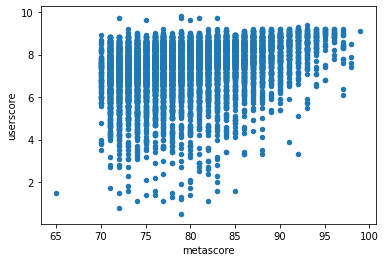

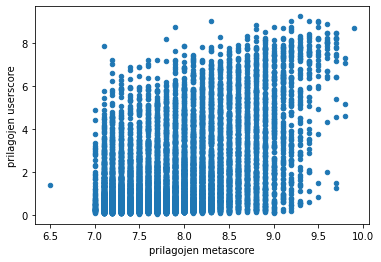

In [15]:
igre.plot.scatter(x="metascore", y="userscore")
igre.plot.scatter(x="prilagojen metascore", y="prilagojen userscore")

Nič presenetljivega ne opazimo, točke so precej enakomerno porazdeljene. Morda res vidimo, da se oba tabora strinjata pri kvaliteti najboljših iger. Toda lahko izluščimo nekaj zelo zanimivega.

Ne smemo pozabiti, da so surovi podatki 10000 iger z najboljšim metascorom. Vendar pa pri userscoru vidimo precejšnjo varianco. Torej so igre, ki jih strokovnjaki ocenjujejo nadpovprečno, vseeno zelo mešane kvalitete. Prvi graf na to namiguje, drugi pa to potrdi. Sklepamo lahko, da se mnenja strokovnjakov in uporabnikov ne ujemajo nujno.

## Katere igre so najboljše?

Preden odgovorimo na to vprašanje, bomo ločili igre glede na platformo. Različna strojna oprema in različna implementacija pomenita, da se lahko kvaliteta od platforme do platforme precej razlikuje. Zato bomo v določenih pogledih obravnavali najboljše igre na vsaki platformi posebej.

In [16]:
igre.platforma.unique()

array(['Nintendo 64', 'PC', 'PlayStation 4', 'PlayStation 3', 'Switch',
       'Wii', 'Xbox 360', 'Xbox One', 'PlayStation 2', 'GameCube',
       'PlayStation', 'Xbox', 'Wii U', '3DS', 'PlayStation Vita', 'DS',
       'PSP', 'Game Boy Advance', 'Dreamcast', 'Stadia'], dtype=object)

Na tem mestu bomo iz nadaljne analize izvzeli igre, ki so na platformi *Stadia*. No, pravzaprav dve igri:

In [17]:
igre[igre["platforma"] == "Stadia"]

,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis,prilagojen userscore,prilagojen metascore,prilagojena ocena
6621,543556,Get Packed,Stadia,Coatsink Software,Apr,2020,81.0,8.0,7.3,13.0,E10+,1.0,Get Packed is a couch co-op removals game with...,0.33,8.1,8.43
8928,548067,Orcs Must Die! 3,Stadia,Robot Entertainment,Jul,2020,73.0,15.0,7.1,14.0,T,1.0,Orcs Must Die! 3 ushers orc-slaying mayhem to ...,0.35,7.3,7.65


*Stadia* je *cloud gaming service*, ki ga je razvil *Google*. Ideja je preprosta. Z mesečno naročnino imaš dostop do računalniške strojne opreme, ki jo nudi *Google*, tako da doma ne potrebuješ najzmogljivejših konzol. Potrebuješ samo zaslon, tipkovnico ali kontroler in dovolj dobro internetno povezavo. Ideja je v teoriji sicer dobra, vendar se v praksi še ni tako zelo prijela. Dejstvo, da sta med 10.000 najboljšimi igrami le dve s te platforme, je dokaz tega, in bomo zato brez slabe vesti *Stadio* izvzeli iz nadaljnje analize.

In [18]:
seznam_platform = igre[igre["platforma"] != "Stadia"]["platforma"].unique()
seznam_platform 

array(['Nintendo 64', 'PC', 'PlayStation 4', 'PlayStation 3', 'Switch',
       'Wii', 'Xbox 360', 'Xbox One', 'PlayStation 2', 'GameCube',
       'PlayStation', 'Xbox', 'Wii U', '3DS', 'PlayStation Vita', 'DS',
       'PSP', 'Game Boy Advance', 'Dreamcast'], dtype=object)

In [19]:
igre_po_platformi = {}
for platforma in seznam_platform:
    igre_po_platformi[platforma] = igre[igre.platforma == platforma]

igre_po_platformi["PC"]

,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis,prilagojen userscore,prilagojen metascore,prilagojena ocena
1,231309,The Witcher 3: Wild Hunt,PC,Warner Bros. Interactive Entertainment,May,2015,93.0,32.0,9.4,17482.0,M,1.0,With the Empire attacking the Kingdoms of the ...,9.26,9.3,18.56
4,103028,Half-Life 2,PC,VU Games,Nov,2004,96.0,81.0,9.1,10760.0,M,1.0,"By taking the suspense, challenge and visceral...",8.88,9.6,18.48
6,142928,Portal 2,PC,Valve Software,Apr,2011,95.0,52.0,9.1,7471.0,E10+,NaN,Valve is working on a full-length sequel to it...,8.78,9.5,18.28
10,100055,Half-Life,PC,Sierra Entertainment,Nov,1998,96.0,24.0,9.0,4316.0,M,1.0,Half-Life combines great storytelling in the t...,8.47,9.6,18.07
13,101386,Team Fortress 2,PC,Electronic Arts,Oct,2007,92.0,17.0,9.1,6719.0,M,32.0,Team Fortress 2 (TF2) is the sequel to the gam...,8.75,9.2,17.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9684,517381,Masters of Anima,PC,Focus Home Interactive,Apr,2018,71.0,7.0,5.2,6.0,NaN,1.0,Delve into an original adventure and defy the ...,0.11,7.1,7.21
9685,219053,Harold,PC,Moon Spider Studio,Feb,2015,70.0,17.0,6.0,10.0,NaN,NaN,Harold is a singleplayer sidescrolling platfor...,0.21,7.0,7.21
9699,104324,Sentinel: Descendants in Time,PC,The Adventure Company,Dec,2004,71.0,16.0,6.0,4.0,E,1.0,The Tastan civilization succumbed to extinctio...,0.09,7.1,7.19
9700,547162,Willy Morgan and the Curse of Bone Town,PC,imaginarylab,Aug,2020,71.0,16.0,6.5,4.0,NaN,1.0,"A letter from 10 years ago, an intricate web o...",0.09,7.1,7.19


Sedaj lahko končno odgovorimo na glavno vprašanje te projektne naloge. Katere so najboljše videoigre?

In [20]:
igre[["naslov", "platforma", "prilagojena ocena"]].head(20)

,naslov,platforma,prilagojena ocena
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,18.59
1,The Witcher 3: Wild Hunt,PC,18.56
2,The Last of Us Remastered,PlayStation 4,18.53
3,The Last of Us,PlayStation 3,18.50
4,Half-Life 2,PC,18.48
5,God of War,PlayStation 4,18.45
6,Portal 2,PC,18.28
7,The Witcher 3: Wild Hunt,PlayStation 4,18.24
8,Super Mario Odyssey,Switch,18.18
9,The Legend of Zelda: Breath of the Wild,Switch,18.16


Poglejmo še, katere so najbolj priljubljene igre na posamezni platformi:

In [21]:
for platforma in igre_po_platformi:
    display(platforma)
    display(igre_po_platformi[platforma][["naslov", "prilagojena ocena"]].sort_values(
        "prilagojena ocena", ascending=False).head(5))

'Nintendo 64'

,naslov,prilagojena ocena
0,The Legend of Zelda: Ocarina of Time,18.59
81,The Legend of Zelda: Majora's Mask,16.99
82,Super Mario 64,16.98
212,GoldenEye 007,16.00
396,Perfect Dark,15.11


'PC'

,naslov,prilagojena ocena
1,The Witcher 3: Wild Hunt,18.56
4,Half-Life 2,18.48
6,Portal 2,18.28
10,Half-Life,18.07
13,Team Fortress 2,17.95


'PlayStation 4'

,naslov,prilagojena ocena
2,The Last of Us Remastered,18.53
5,God of War,18.45
7,The Witcher 3: Wild Hunt,18.24
14,Red Dead Redemption 2,17.94
16,Bloodborne,17.87


'PlayStation 3'

,naslov,prilagojena ocena
3,The Last of Us,18.50
11,Uncharted 2: Among Thieves,18.06
22,Red Dead Redemption,17.74
30,Metal Gear Solid 4: Guns of the Patriots,17.65
33,Batman: Arkham City,17.61


'Switch'

,naslov,prilagojena ocena
8,Super Mario Odyssey,18.18
9,The Legend of Zelda: Breath of the Wild,18.16
60,Super Smash Bros. Ultimate,17.14
91,Astral Chain,16.91
109,Mario Kart 8 Deluxe,16.75


'Wii'

,naslov,prilagojena ocena
12,Super Mario Galaxy,17.96
15,Super Mario Galaxy 2,17.91
46,The Legend of Zelda: Twilight Princess,17.36
73,Super Smash Bros. Brawl,17.06
102,Xenoblade Chronicles,16.85


'Xbox 360'

,naslov,prilagojena ocena
17,Mass Effect 2,17.86
26,Red Dead Redemption,17.71
29,The Elder Scrolls V: Skyrim,17.65
31,BioShock,17.65
41,Grand Theft Auto V,17.46


'Xbox One'

,naslov,prilagojena ocena
19,The Witcher 3: Wild Hunt,17.81
97,Red Dead Redemption 2,16.88
163,Ori and the Will of the Wisps,16.40
191,Grand Theft Auto V,16.13
228,Forza Horizon 4,15.91


'PlayStation 2'

,naslov,prilagojena ocena
27,Grand Theft Auto: San Andreas,17.69
50,Resident Evil 4,17.31
70,Metal Gear Solid 2: Sons of Liberty,17.08
74,God of War,17.06
100,Final Fantasy X,16.86


'GameCube'

,naslov,prilagojena ocena
40,Resident Evil 4,17.46
66,The Legend of Zelda: The Wind Waker,17.11
69,Metroid Prime,17.09
171,The Legend of Zelda: Twilight Princess,16.29
190,Super Smash Bros. Melee,16.13


'PlayStation'

,naslov,prilagojena ocena
52,Final Fantasy VII,17.27
53,Metal Gear Solid,17.25
104,Final Fantasy IX,16.83
202,Tekken 3,16.05
225,Final Fantasy VIII,15.92


'Xbox'

,naslov,prilagojena ocena
55,Halo: Combat Evolved,17.21
115,Halo 2,16.71
455,Star Wars: Knights of the Old Republic,14.87
942,Tom Clancy's Splinter Cell Chaos Theory,13.41
1048,Fable,13.13


'Wii U'

,naslov,prilagojena ocena
59,Super Mario 3D World,17.14
75,Super Smash Bros. for Wii U,17.05
89,The Legend of Zelda: Breath of the Wild,16.91
143,Mario Kart 8,16.51
146,Bayonetta 2,16.49


'3DS'

,naslov,prilagojena ocena
65,The Legend of Zelda: Ocarina of Time 3D,17.11
98,Fire Emblem: Awakening,16.88
112,The Legend of Zelda: A Link Between Worlds,16.72
229,Super Mario 3D Land,15.89
333,Animal Crossing: New Leaf,15.35


'PlayStation Vita'

,naslov,prilagojena ocena
110,Persona 4 Golden,16.72
583,Gravity Rush,14.43
637,Tearaway,14.26
780,Killzone: Mercenary,13.84
820,LittleBigPlanet PS Vita,13.75


'DS'

,naslov,prilagojena ocena
219,Ghost Trick: Phantom Detective,15.95
264,Pokemon SoulSilver Version,15.66
269,Pokemon HeartGold Version,15.63
271,Chrono Trigger,15.63
366,Mario Kart DS,15.25


'PSP'

,naslov,prilagojena ocena
307,God of War: Chains of Olympus,15.47
429,Metal Gear Solid: Peace Walker,14.96
549,Crisis Core: Final Fantasy VII,14.54
587,Z.H.P. Unlosing Ranger vs Darkdeath Evilman,14.42
644,Final Fantasy Tactics: The War of the Lions,14.23


'Game Boy Advance'

,naslov,prilagojena ocena
316,The Legend of Zelda: A Link to the Past,15.43
578,Final Fantasy VI Advance,14.45
713,Metroid Fusion,14.01
734,Pokemon Emerald Version,13.96
747,The Legend of Zelda: The Minish Cap,13.94


'Dreamcast'

,naslov,prilagojena ocena
592,SoulCalibur,14.41
687,Sonic Adventure 2,14.07
795,Shenmue II,13.81
1462,Resident Evil 3: Nemesis,12.34
1592,Skies of Arcadia,12.11


V nadaljnji analizi bomo ponekod pogledali le podatke **dobrih iger**, torej tiste, ki so v prvi polovici, in **najboljše igre**, ki so v prvih 5 %. Zato nam bo prišlo prav, če na tem mestu uvedemo ti dve skupini iger:

In [48]:
dobre_igre = igre.head(5000)
najboljse_igre = igre.head(500)

## Katera platforma je nabolj uspešna?

Zanima nas, katera **platforma** je bila najbolj uspešna. Enostavno preštejmo, koliko iger se je pojavilo v naših podatkih:

<AxesSubplot:xlabel='platforma'>

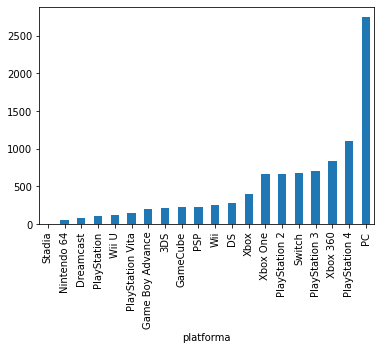

In [22]:
st_iger_na_platformo = igre.groupby("platforma").size().sort_values()
st_iger_na_platformo.plot.bar()

Da je računalnik najbolj priljubljena platforma, nas ne preseneča. Nekoliko nepošteno je primerjati konzole z račualnikom, saj se računalniki sčasoma spreminjajo, si izboljšujejo strojno opremo, pa vendar ostajajo pod istim imenom. Konzole pa izidejo z neko strojno opremo in ko je ta zastarela, izide naslednja generacija konzol. Tako imamo sosledja *PlayStation 2*, *PlayStation 3*, *PlayStation 4* in *Xbox*, *Xbox 360*, *Xbox One*.

Med konzolami so torej najboljše *PlayStation 4*, *Xbox 360*, *PlayStation 3*.

Če smo se že tako trudili, da smo naredili lastno metriko, poglejmo, na katerih konzolah se pojavijo najboljše igre.

<AxesSubplot:xlabel='platforma'>

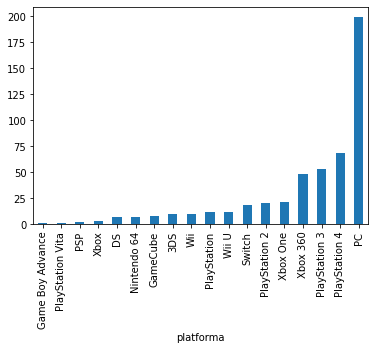

In [49]:
st_iger_na_platformo_najboljse = najboljse_igre.groupby("platforma").size().sort_values()
st_iger_na_platformo_najboljse.plot.bar()

Opazimo zelo podobne rezultate. Med konzolami še vedno prevladuje *PlayStation 4*, tik za petami pa sta mu tokrat ročna konzola *Switch* in nato *PlayStation 2*.

Pozoren bralec bo opazil, da se igre z istim imenom pojavijo večkrat na različnih platformah. Kot rečeno, se lahko izkušnja od platforme do platforme precej razlikuje. *PlayStation 4* ima na primer kontroler, ki se trese, medtem ko igraš, *Switch* ti nudi igranje na poti, *PC* pa seveda najboljše grafične zmogljivosti.

To, da pa igre nastopajo na različnih platformah, nam da izvrstno priložnost, da jih med sabo primerjamo. Izkušnja ne bo odvisna od vsebine igre, temveč samo od zmožnosti platforme.

In [24]:
naslovi = igre.naslov.unique()
veckratni = []
for naslov in naslovi:
    if igre.groupby("naslov").size()[naslov] > 1:
        veckratni.append(naslov)
        
score = {}
for naslov in veckratni:
    top_platforma = igre[igre.naslov == naslov].sort_values("prilagojena ocena").iloc[0]["platforma"]
    if top_platforma in score.keys():
        score[top_platforma] += 1
    else:
        score[top_platforma] = 1

<AxesSubplot:xlabel='platforme'>

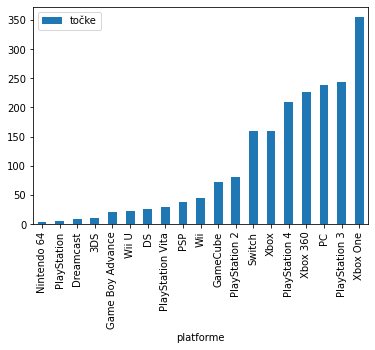

In [51]:
konzole = pd.DataFrame(list(score.items()), columns = ['platforme','točke']).sort_values("točke")
konzole.plot.bar(x="platforme", y="točke")

Rezultati presenetljivo prikazujejo, da je najbolje igrati na *Xbox One*.

Eno izmed vprašanj, na katero sem želel odgovoriti, je stalnica v svetu videoiger že od leta 2013. Katera konzola je boljša, *PlayStation 4* ali *Xbox One*? Na to vprašanje tudi sedaj ne bom odgovoril, saj ne vem, kakšnega prepričanja je ocenjevalec moje projektne naloge. Na podlagi podatkov pa lahko naredimo naslednje sklepe.

S stališča zmogljivosti je *Xbox One* boljša, saj so igre na njej najbolje ocenjene. Kljub temu pa je, kot pikazujeta prejšnja grafa, večji del najboljših iger na *PlayStation 4*. Razlog je v tem, da *Sony*, podjetje, ki je lastnik konzol *PlayStation*, razvija ekskluzivne igre, ki jih lahko igraš samo na njihovih platformah. Ker morajo te igre prepričati ljudi, da zanje kupijo konzolo, so pogosto boljše. *Microsoft*, lastnik *Xbox* konzol, je dolgo poskušal najti svoje ekskluzivne igre, a se preprosto ne morejo kosati z naslovi, kot so *The Last of Us*, *God of War* ali *Spider Man*. Nasploh ima *Microsoft* drugačno mentaliteto, kar se tega tiče. Kvečjemu poskrbijo, da igre ne izidejo na *PlayStation* konzolah, vseeno pa izidejo na računalnikih. 

Debata ostaja odprta.

Ob času pisanja pa smo ravno v napetem obdobju, ko izhaja nova generacija igralnih konzol; *PlayStation 5* in *Xbox Series X*.
Trenutno kaže, da v bitki vodi *PlayStation 5*.

## Kateri studio je najbolj uspešen?

Sedaj poglejmo, kateri **studio** se lahko pohvali z najboljšimi igrami.

<AxesSubplot:xlabel='studio'>

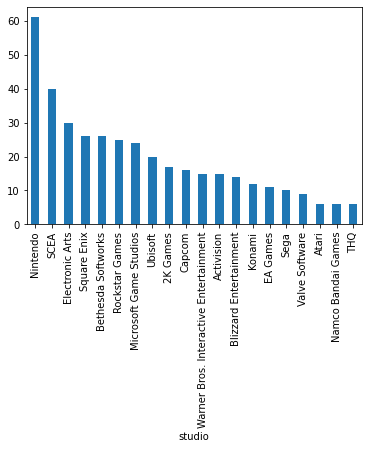

In [52]:
st_iger_na_studio_najboljse = najboljse_igre.groupby("studio").size().sort_values(ascending=False).head(20)
st_iger_na_studio_najboljse.plot.bar()

*Ninetendo*. Ta rezultat gotovo nikogar ne preseneča. *Mario*, *Legend of Zelda*, *Pokemon*, *Metroid*, *Animal Crossing*, *Smash Bros*. Te naslove gotovo vsi poznamo. 
Pisalo se je 1985, ko je *Nintendo* na Japonskem izdal *Super Mario Bros.* in leto pozneje je ta uspešnica skupaj z *Metroid* in *Legend of Zelda* zavzela ZDA.
Začelo se je obdobje videoiger, kot jih poznamo danes. Torej ne na arkadah, ampak doma. *Nintendo entertainment sistem* ali *NES* je bila ena prvih konzol, ki je to omogočala. Bili so tudi pionirji na področju 3D videoiger z njihovo konzolo *Nintendo64*.
Sčasoma so se bolj posvetili ročnim konzolam, kot so *DS*, *3DS* in sedaj *Switch*.
Podjetje dela izključno ekskluzivne igre za svoje konzole.

## Kaj lahko povemo o datumu?

Med drugim sem zbral podatke o **mesecu** in **letu**, kdaj je katera igra izšla. Sedaj bi se malo poigral s tem. 
Zanimivo bo videti, katera leta so bila najboljša za videoigre. 
Prav tako me zanima, če mesec izida kaj vpliva na uspeh iger. Natančneje, ali je med poletnimi počitnicami, ko imajo mladostniki več časa, ali pa decembra, ko starši raje kupijo igre, izdanih več uspešnih iger?

Najprej pogljemo leto.

<AxesSubplot:xlabel='leto'>

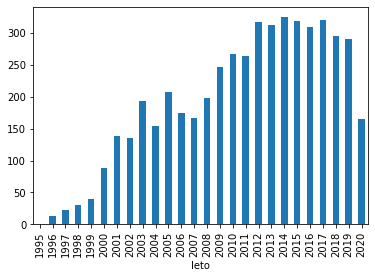

In [53]:
st_iger_na_leto_dobre = dobre_igre.groupby("leto").size()
st_iger_na_leto_dobre.plot.bar()

<AxesSubplot:xlabel='leto'>

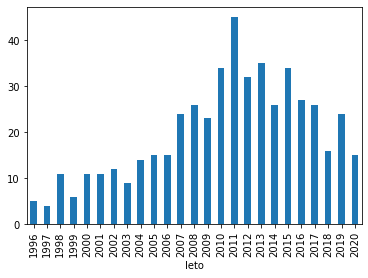

In [54]:
st_iger_na_leto_najboljse = najboljse_igre.groupby("leto").size()
st_iger_na_leto_najboljse.plot.bar()

Prvi graf prikazuje, da je z leti vedno več dobrih iger. Sklepam, da je to enostavno posledaica tega, kako deluje naša metrika.
Mi damo namreč velik poudarek na glasovom uporabnikov njihovemu številu. Potem pa vplivajo številni dejavniki, da je več uporabnikov ocenilo igre.
Sama stran *Metacritic* je izšla leta 2001, potem pa je gotovo trajalo še nekaj let, da se je prijela in da so ljudje začeli množično podajati svoja mnenja.
Poleg tega proizvajalci zadnjih 10 let izvajajo kampanje in ogromne promocije, da širša publika izve za njihove igre.
Še ena opazka. 2020 ima manj iger, iz očitnih razlogov. Poleg tega so bili podatki zbrani jeseni, ko večina iger leta še ni izšla.

Drugi graf pa pokaže, da je bilo najboljše leto za igre 2011. In če spodaj pogledamo, katere igre so to bile, nas rezultat ne preseneča. *Minecraft*, *Portal*, *The Elder Scrolls V: Skyrim*, pa še marsikaj.

In [30]:
igre[igre["leto"] == 2011].head(10)

,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis,prilagojen userscore,prilagojen metascore,prilagojena ocena
6,142928,Portal 2,PC,Valve Software,Apr,2011,95.0,52.0,9.1,7471.0,E10+,NaN,Valve is working on a full-length sequel to it...,8.78,9.5,18.28
29,167515,The Elder Scrolls V: Skyrim,Xbox 360,Bethesda Softworks,Nov,2011,96.0,89.0,8.6,3944.0,M,1.0,The next chapter in the Elder Scrolls saga arr...,8.05,9.6,17.65
33,131112,Batman: Arkham City,PlayStation 3,Warner Bros. Interactive Entertainment,Oct,2011,96.0,42.0,8.8,2766.0,T,1.0,"Developed by Rocksteady Studios, Batman: Arkha...",8.01,9.6,17.61
37,167517,The Elder Scrolls V: Skyrim,PC,Bethesda Softworks,Nov,2011,94.0,32.0,8.3,11288.0,M,1.0,The next chapter in the Elder Scrolls saga arr...,8.11,9.4,17.51
61,167225,Uncharted 3: Drake's Deception,PlayStation 3,SCEA,Nov,2011,92.0,97.0,8.4,4601.0,T,10.0,"A search for the fabled ""Atlantis of the Sands...",7.93,9.2,17.13
65,172500,The Legend of Zelda: Ocarina of Time 3D,3DS,Nintendo,Jun,2011,94.0,85.0,9.0,1624.0,E10+,1.0,The Legend of Zelda: Ocarina of Time is being ...,7.71,9.4,17.11
86,131797,Batman: Arkham City,PC,Warner Bros. Interactive Entertainment,Nov,2011,91.0,27.0,8.7,2460.0,T,NaN,DC Comics' Dark Knight clashes with the Joker ...,7.84,9.1,16.94
93,111447,Deus Ex: Human Revolution,PC,Eidos Interactive,Aug,2011,90.0,52.0,8.5,3581.0,M,1.0,In Deus Ex: Human Revolution you play Adam Jen...,7.90,9.0,16.90
94,127021,The Witcher 2: Assassins of Kings,PC,Atari,May,2011,88.0,76.0,8.5,5494.0,M,1.0,The Witcher 2 is the sequel to developer CD Pr...,8.10,8.8,16.90
95,131111,Batman: Arkham City,Xbox 360,Warner Bros. Interactive Entertainment,Oct,2011,94.0,87.0,8.7,1680.0,T,1.0,"Developed by Rocksteady Studios, Batman: Arkha...",7.49,9.4,16.89


Poglejmo še, kakšen je vpliv meseca izida na uspeh. Da bomo imeli mesece v običajnem vrstem redu, spišimo spodnji slovar.

In [56]:
meseci = {"Jan" : 0, "Feb" : 1, "Mar" : 2, "Apr" : 3, "May" : 4, "Jun" : 5,
    "Jul" : 6, "Aug" : 7, "Sep" : 8, "Oct" : 9, "Nov" : 10, "Dec" : 11}

<AxesSubplot:xlabel='mesec'>

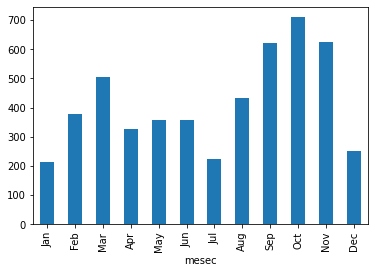

In [57]:
st_iger_na_mesec_dobre = dobre_igre.groupby("mesec").size().sort_index(key = lambda x: x.map(meseci))
st_iger_na_mesec_dobre.plot.bar()

<AxesSubplot:xlabel='mesec'>

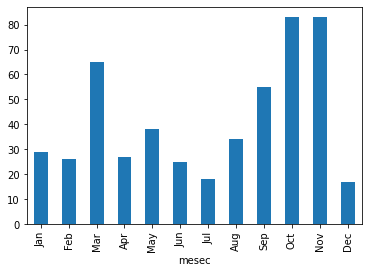

In [58]:
st_iger_na_mesec_najboljse = najboljse_igre.groupby("mesec").size().sort_index(key = lambda x: x.map(meseci))
st_iger_na_mesec_najboljse.plot.bar()

Zgornja grafa prikazujeta, da je bila moja hipoteza pravilna. Poletni in božični čas vplivata na število dobrih iger, če gledamo dobre igre in najboljše igre nasploh. Presenetljivo je korelacija negativna. Ravno v tem času je izdanih najmanj uspešnih iger. Menim, da je razlog za to naslednji.

Videoigre so izredno zahteven medij, kar se tiče proizvodnje, morda celo bolj kot film. Programiranje dejanske igre, snemanje glasov, izdelava grafik. Iskreno sploh ne vem, kaj vse se dogaja v zakulisju. Nekaj pa je jasno, to je drag posel, ki pa lahko vrne ogromen dobiček. Poudarek na lahko. Podjetja zato iščejo investitorje, ki pa gledajo le na denar. Tako kot sem sklepal jaz, tudi oni menijo, da so prazniki in poletno obdobje najboljši čas za prodajo in zato spodbujajo ali zahtevajo, da studii izdajo igre v teh sezonah. Časovna stiska in zahtevnost proizvodnje pomenita, da se v zadnjih mesecih izdelave res hiti. Posledično pride do izdelkov, ki niso tako popolni, kot bi lahko bili. Konkreten primer tega je *Ciberpunk 2077*. To naj bi bila najbolj ambiciozna igra tega desetletja, a je žal ravno iz teh razlogov še ena žrtev leta 2020.

## Vpliv oznak

Zanima nas, kako **oznake** iger vplivajo na njihov uspeh.

Tako kot filmi lahko igre vsebujejo bolj ali manj primerne vsebine. Proizvajalci na to opozorijo z oznako, ki namigne, keterim starostnim skupinam je igra namenjena.
Glede na to, da je *Metacritic* ameriška spletna stran, so oznake v mojih podatkih sicer po ameriških standartih, ampak bomo vseeno lahko kaj sklepali. Za lažje razumevanje navajam, kaj katera oznaka pomeni:

* **E Everyone** Primerno za vse starosti. Včasih pod oznako **K-A**.  
* **E10+ Everyone 10+** Primerno za 10 let in starejše.
* **T Teen** Primerno za najstnike oziroma starejše od 13 let.  
* **M Mature 17+** Za starejše od 17 let.  
* **AO Adults Only** Za starejše od 18 let.   
* **RP Rating Pending** Igra še ni ocenjena.  

Bolj natančen opis posamezne kategorije je dostopen na strani [*ESRB*](https://www.esrb.org/ratings-guide/).

<AxesSubplot:xlabel='oznaka'>

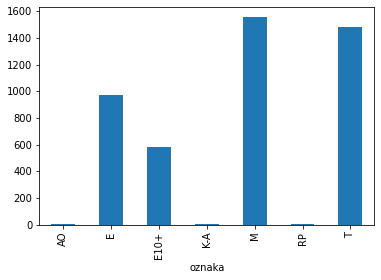

In [59]:
oznake_dobre = dobre_igre.groupby("oznaka").size()
oznake_dobre.plot.bar()

Največ dobrih iger spada v kategoriji *Teen* in *Mature*. Te igre lahko vsebujejo nasilje, kri, kletvice in spolne vsebine. Običajno gre za bolj realistične igre, zato je treba na nasilje primerno opozoriti. Ampak se zdi, da ni tako velike razlike med igrami z bolj lahkotno in bolj zrelo vsebino. Morda kaj več odkrijemo, če pogledamo najboljše igre.

<AxesSubplot:xlabel='oznaka'>

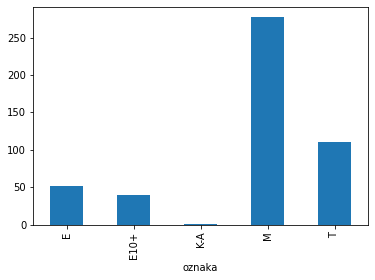

In [60]:
oznake_najboljse = najboljse_igre.groupby("oznaka").size()
oznake_najboljse.plot.bar()

Na zgornjem grafu pa izstopa oznaka *M*. Sicer ne želim komentirati, kaj to pomeni, da se najraje ubadamo s takimi vsebinami. Sem pa za šalo pogledal, kaj pravijo podatki za filme s predavanj, in zdi se, da so tudi tam najbolj priljubljeni filmi z oznako *R*, torej tudi primerno za starejše od 17 let.

Če morda koga zanima primer "igre za odrasle":

In [35]:
igre[igre.oznaka == "AO"]

,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis,prilagojen userscore,prilagojen metascore,prilagojena ocena
1327,162678,Grand Theft Auto: San Andreas,Xbox,Rockstar Games,Jun,2005,93.0,58.0,8.7,165.0,AO,2.0,Five years ago Carl Johnson escaped from the p...,3.29,9.3,12.59


## Vpliv žanra

Poglejmo, kaj lahko povemo o **žanru**. Za razliko od filma se ta ne navezuje samo na vsebino zgodbe v igri, ampak tudi na to, kakšne vrste igra je (strelska, dirkalna, platformer ipd.), in kako deluje (v prvi osebi, 3D ali 2D ipd.).

<AxesSubplot:xlabel='zanr'>

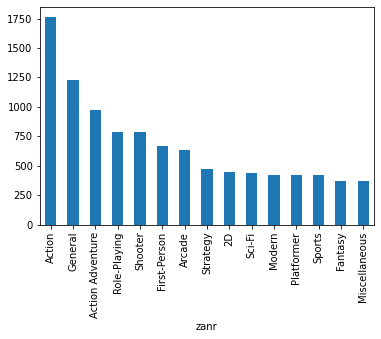

In [62]:
zanri_dobrih_iger = dobre_igre.merge(zanri)
zanri_dobre = zanri_dobrih_iger.groupby("zanr").size().sort_values(ascending=False).head(15)
zanri_dobre.plot.bar()

<AxesSubplot:xlabel='zanr'>

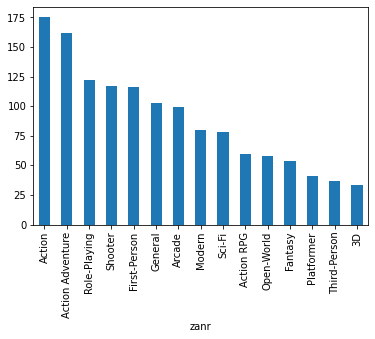

In [63]:
zanri_najboljsih_iger = najboljse_igre.merge(zanri)
zanri_najboljse = zanri_najboljsih_iger.groupby("zanr").size().sort_values(ascending=False).head(15)
zanri_najboljse.plot.bar()

Zdi se, da tako pri dobrih kot najboljših igrah izstopajo podobni žanri.
Prevladale so akcijske igre. Spet lahko podoben trend opazimo pri filmih, če se poglobimo v podatke s predavanj.  
Morda še nekaj opazk. *Role-Paying* so igre, kjer z dejanji vplivaš na potek zgodbe. Ta torej ni čito določena vnaprej in linearna. Tako se lahko bolj poglobiš v zgodbo in v virtualni svet, ki te obdaja. Zdi se, da je to večini igralcev najbolj pri srcu. Strelske igre so popularne, kar ne preseneča. Morda v oči bode *Western-Style*. Za to sta verjetno odgovorni *Red Dead Redemption* in *Red Dead Redemption 2*, tudi eni izmed najbolj priznanih iger tega desetletja.
Pravzaprev nam ti podatki povedo, da čeprav so najuspešnjše igre akcijske, so te v drugih pogledih, kot sta stil ali zgodba, precej raznolike.

## Enoigralski ali večigralski  način

Sedaj bomo pogledali, ali so bolj uspešne **enoigralske** ali **večigralske** igre. V enoigraskih igrah igraš sam. Običajno gre za bolj zaključene celote s poudarkom na zgodbi, kot film, v katerem lahko sodeluješ. Večigralske igre so po naravi bolj odprte in prava zabava je v tem, da igraš s prijateljem ali proti njemu. Te so igrišča, ki ti omogočajo zabavo na spletu. Zanima nas tudi, ali so bolj uspešne večigralske igre, ko igraš samo z enim prijateljem ali pa vas je več.

<AxesSubplot:xlabel='stevilo igralcev'>

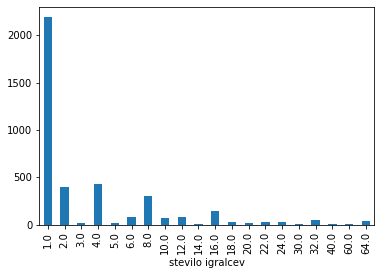

In [64]:
igralski_nacin_dobre = dobre_igre.groupby("stevilo igralcev").size()
igralski_nacin_dobre.plot.bar()

<AxesSubplot:xlabel='stevilo igralcev'>

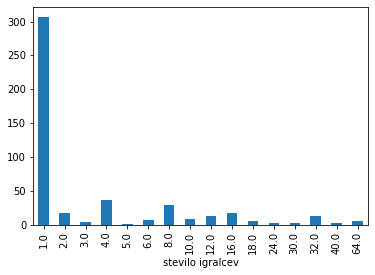

In [65]:
igralski_nacin_najboljse = najboljse_igre.groupby("stevilo igralcev").size()
igralski_nacin_najboljse.plot.bar()

Odgovor je jasen. Bolj uspešne so enoigralske igre, tako med dobrimi kot najboljšimi. Med večigralskimi pa so boljše tiste, ko naenkrat skupaj igra manj ljudi. Za to vidim nekaj razlogov.

* Enoigralske igre so veliko bolj dostopne. Vsakdo se lahko prepusti izkušnji in si pogosto lahko celo prilagodi težavnost. Večigralske igre so veliko bolj zapletene. Preden jih začneš igrati, se moraš ogromno naučiti. Še več dela pa je, da postaneš dober v njih. Zato se je razvila *Esports* scena, to so športna tekmovanja v videoigrah, ki postajajo vedno bolj popularna in posledično so denarne nagrade vedno večje. Nekaj primerov je *Super Smash Bros.*, *League of Legends* ali *Overwatch*.

* Ker pri večigralskih igrah prideš v stik z neznanci na spletu, se združita tekmovalnost profesionalnega športa in anonimnost spleta, rezultat pa je lahko res neprijetno okolje. Da se preklinja in zmerja, ni nič nenavadnega. Potrpljenja za novince je malo in od tu prihaja izraz *noob*, ki ga otroci dandanes radi mečejo naokoli. Če je igra namenjena manj igralcem, jo boš verjetno igral s prijatelji in do teh težav ne bo prišlo. Menim, da so zato take igre med večigralskimi bolj uspešne.

* Ker so enoigralske igre zaključena celota, jih lahko končaš. To je za nekatere ljudi zelo pomembno. Tako imaš občutek, da si nekaj dosegel, vseeno pa se lahko vrneš k izkušnji in jo igraš od začetka. Večigralske igre pa so narejene tako, da vanje vložiš čim več časa. Sama izkušnja mora biti dovolj zabavna, da se vedno znova vrneš. Večina ljudi preprosto nima časa, da bi si to privoščila.

* Zadnja in nekoliko banalna točka. Enoigralsko igro lahko daš na pavzo, večigralske pa ne.

# 3. Katere igre naj igram?

Kot vesten in delaven študent nimam privilegija, da bi čas zapravljal za iskanje videoiger za krajšanje prostega časa, ko bo ta napočil. V ta namem sem pripravil program, ki sprejme seznam **id-jev iger**, ki sem jih že igral, **platforme**, ki so mi na voljo, in **oznake**. Nato vrne priporočila, katere igre bi me morda zanimale. Upošteva naslednje kriterije:

* Platforme, ki so mi na razpolago.
* Oznake iger, ki jih smem igrati.
* Žanr mojih iger.
* Besedilo v opisih iger.
* Kvaliteto iger po naši metriki.

Natančneje:  
Program najprej izbere vse primerne kandidate, torej tiste igre, ki so na pravih platformah in imajo pravo oznako, ter odstrani igre, ki smo jih že igrali.  
Žanr upoštevamo na sledeč način. Program najprej pogleda podatke iger, ki smo jih že igrali. Za vsak žanr izračuna, kolikšen delež žanrov iger, ki smo jih igrali, je tega žanra. Za dano igro seštejemo pripadajoče deleže njenih žanrov. Tako dobimo utež za žanr, neko število `Uz` med 0 in 1.  
Sedaj še opis. Program naredi množico vseh korenov besed, ki se pojavijo v opisih igranih iger. Nato opis vsake igre, če ga ima, razbijemo na korene in pogledamo, kolikšen delež korenov besed tega opisa je v množici. Tako dobimo utež za opis `Uo`.  
**Ocena priporočila** je naša prilagojena ocena, obtežena z zgornjima utežema, torej `Op = Po * Uz * Uo`, kjer je `Po` prilagojena ocena.

Za obdelavo korenov besed sem si sposodil kodo s predavanj.

In [40]:
def koren_besede(beseda):
    beseda = ''.join(znak for znak in beseda if znak.isalpha())
    if not beseda:
        return '$'
    konec = len(beseda) - 1
    if beseda[konec] in 'ds':
        konec -= 1
    while konec >= 0 and beseda[konec] in 'aeiou':
        konec -= 1
    return beseda[:konec + 1]

def koreni_besed(niz):
    if type(niz) == str: #Če igra morda nima opisa
        return [koren_besede(beseda) for beseda in niz.lower().split() if len(koren_besede(beseda)) > 2]
    else:
        return []

In [69]:
def priporocene_igre(ze_igrano, platforme, oznake):
    # Maske
    def pomozna_platforma(niz):
        return niz in platforme
    def pomozna_oznaka(niz):
        return niz in oznake
    def pomozna_id(n):
        return n in ze_igrano
    # Kandidati
    kandidati = igre[(igre["platforma"].apply(pomozna_platforma)) & (igre["oznaka"].apply(pomozna_oznaka)) 
                     & (igre["id"].apply(lambda x: not pomozna_id(x)))].copy()
    # Žanr
    def utez_zanr(tabela_iger):
        zanri_igranih = zanri[zanri["id"].apply(pomozna_id)].groupby("zanr").size()
        odstotki_zanri_igranih = (zanri_igranih / zanri_igranih.sum()).to_dict()
        def ujemanje_zanrov(_id):
            zanri_igre = zanri[zanri["id"] == _id].copy()
            def zanr_v_delez(niz):
                if niz in odstotki_zanri_igranih:
                    return odstotki_zanri_igranih[niz]
                else:
                    return 0
            return zanri_igre["zanr"].apply(zanr_v_delez).sum()
        
        tabela_iger["utež žanr"] = tabela_iger["id"].apply(ujemanje_zanrov)
        
    # Opis
    def utez_opis(tabela_iger):
        besede_igranih = set()
        for opis in igre[igre["id"].apply(pomozna_id)]["opis"].tolist():
            besede_igranih.update(koreni_besed(opis))
        def delez_dobrih_besed(niz):
            besede = koreni_besed(niz)
            count = 0
            for beseda in besede:
                if beseda in besede_igranih:
                    count += 1
            return count / (len(besede) + 0.01) # Da ne delimo z 0
        
        tabela_iger["utež opis"] = tabela_iger["opis"].apply(delez_dobrih_besed)
    
    # Ocena priporočila
    def ocena_priporocila(tabela_iger):
        utez_zanr(tabela_iger)
        utez_opis(tabela_iger)
        tabela_iger["ocena priporočila"] = (
            tabela_iger["prilagojena ocena"] * tabela_iger["utež žanr"] * tabela_iger["utež opis"]
        )
        
    ocena_priporocila(kandidati)
    
    return kandidati.sort_values("ocena priporočila", ascending=False).head(15)

Da lahko program preizkusimo, sem sestavil seznam iger, ki sem jih preigral, ter moje platforme in oznake:

In [42]:
moje_igre = [143104, 235439, 510872, 113955, 108940, 527417, 204712, 381511, 412871, 297560, 167419, 491138, 231309,
             455529, 455528, 230240, 107838, 109864, 115164, 135708, 110750, 527326, 170232, 477066, 213209, 499153,
             182288, 316002, 510045, 492827, 535703, 109325, 154578, 206739, 114802, 155836, 143153, 491124, 480909]
moje_platforme = ['PC', 'DS']
moje_oznake = ['K-A', 'E', 'E10+', 'M', 'T', 'AO']

In [70]:
priporocene_igre(moje_igre, moje_platforme, moje_oznake)

,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis,prilagojen userscore,prilagojen metascore,prilagojena ocena,utež žanr,utež opis,ocena priporočila
875,246534,Mad Max,PC,Warner Bros. Interactive Entertainment,Sep,2015,73.0,22.0,7.8,1117.0,M,1.0,Mad Max places players in the role of a lone w...,6.28,7.3,13.58,0.456693,0.749532,4.648512
93,111447,Deus Ex: Human Revolution,PC,Eidos Interactive,Aug,2011,90.0,52.0,8.5,3581.0,M,1.0,In Deus Ex: Human Revolution you play Adam Jen...,7.90,9.0,16.90,0.480315,0.544038,4.416129
495,110555,Mirror's Edge,PC,EA Games,Jan,2009,81.0,44.0,8.0,1295.0,T,1.0,In a city where information is heavily monitor...,6.61,8.1,14.71,0.496063,0.597632,4.360976
611,101704,Star Wars Jedi Knight II: Jedi Outcast,PC,LucasArts,Mar,2002,89.0,35.0,8.7,452.0,T,16.0,Several years have passed since Kyle Katarn av...,5.44,8.9,14.34,0.425197,0.705779,4.303360
1405,155833,"Nine Hours, Nine Persons, Nine Doors",DS,Aksys Games,Nov,2010,82.0,23.0,8.8,254.0,M,1.0,"In this game, you must help Junpei reclaim his...",4.25,8.2,12.45,0.433071,0.768640,4.144298
438,110946,Mafia II,PC,2K Games,Aug,2010,77.0,46.0,8.2,2039.0,M,1.0,Featuring a deep mobster-driven narrative pack...,7.24,7.7,14.94,0.464567,0.565095,3.922112
616,115245,Metal Gear Rising: Revengeance,PC,Konami,Jan,2014,83.0,27.0,8.0,825.0,M,1.0,Metal Gear Solid Rising makes its way to the P...,6.02,8.3,14.32,0.440945,0.599401,3.784814
79,185492,Dishonored,PC,Bethesda Softworks,Oct,2012,91.0,29.0,8.4,4327.0,M,1.0,Approach each assassination with your own uniq...,7.90,9.1,17.00,0.338583,0.632524,3.640748
2589,131648,Transformers: War for Cybertron,PC,Activision,Jun,2010,75.0,20.0,7.8,189.0,T,NaN,Transformers: War for Cybertron challenges pla...,3.20,7.5,10.70,0.472441,0.719928,3.639321
340,242391,Wolfenstein: The New Order,PC,Bethesda Softworks,May,2014,81.0,23.0,8.2,2074.0,M,1.0,1946: Europe. World War II rages on across Eur...,7.25,8.1,15.35,0.393701,0.601883,3.637366


Če bralec želi preizkusit program, sta tu seznama vseh platform in oznak. Iz teh lahko odstraniš elemente, ki jih ne potrebuješ, in seznama uporabiš v programu. Prav tako je spodaj "brskalnik", da lažje najdeš id-je igre, ki si jih že igral.
Prvi argument naj bo niz, ki nastopi v naslovu igre. Kot drugi neobvezen argument lahko dodaš še platformo.  

Veliko zabave želim!

In [44]:
platforme = ['Nintendo 64', 'PC', 'PlayStation 4', 'PlayStation 3', 'Switch', 'Wii', 'Xbox 360', 'Xbox One', 'PlayStation 2', 
'GameCube', 'PlayStation', 'Xbox', 'Wii U', '3DS', 'PlayStation Vita', 'DS', 'PSP', 'Game Boy Advance', 'Dreamcast' 'Stadia']
oznake = ['K-A', 'E', 'E10+', 'M', 'T', 'AO', 'RP']

In [45]:
def brskalnik(naslov_igre, platforma=None):
    def pomozna_naslov(niz):
        return naslov_igre in niz
    def pomozna_platforma(niz):
        return True if platforma is None else platforma == niz
    return igre[
        (igre["naslov"].apply(pomozna_naslov)) & (igre["platforma"].apply(pomozna_platforma))
               ].sort_values("prilagojena ocena", ascending=False)

In [67]:
brskalnik("Assassin's Creed", "PC")

,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis,prilagojen userscore,prilagojen metascore,prilagojena ocena
245,143104,Assassin's Creed: Brotherhood,PC,Ubisoft,Mar,2011,88.0,24.0,8.2,1606.0,M,NaN,The critically acclaimed single-player experie...,7.01,8.8,15.81
356,235439,Assassin's Creed IV: Black Flag,PC,Ubisoft,Nov,2013,84.0,10.0,7.8,2059.0,M,NaN,The year is 1715. Pirates rule the waters of t...,6.89,8.4,15.29
400,113955,Assassin's Creed II,PC,Ubisoft,Mar,2010,86.0,22.0,7.3,2219.0,M,1.0,Assassin's Creed II is the product of over two...,6.50,8.6,15.10
630,510872,Assassin's Creed Origins,PC,Ubisoft,Oct,2017,84.0,29.0,6.8,1741.0,M,1.0,"Set in mysterious Ancient Egypt, Assassin’s Cr...",5.88,8.4,14.28
687,179972,Assassin's Creed: Revelations,PC,Ubisoft,Nov,2011,80.0,20.0,7.5,1153.0,M,NaN,Revelations follows master assassin Ezio Audit...,6.07,8.0,14.07
709,108940,Assassin's Creed: Director's Cut Edition,PC,Ubisoft,Apr,2008,79.0,38.0,7.5,1205.0,M,1.0,The first game in the Assassin's Creed franchi...,6.12,7.9,14.02
806,527417,Assassin's Creed Odyssey,PC,Ubisoft,Oct,2018,86.0,14.0,6.0,1747.0,M,1.0,Write your own epic odyssey and become a legen...,5.19,8.6,13.79
850,204712,Assassin's Creed III,PC,Ubisoft,Nov,2012,80.0,21.0,6.4,2056.0,M,NaN,"Assume the role of Connor, the son of a Native...",5.65,8.0,13.65
1386,381511,Assassin's Creed Rogue,PC,Ubisoft,Mar,2015,74.0,25.0,7.3,618.0,M,1.0,"18th century, North America. Within the chaos ...",5.07,7.4,12.47
1553,412871,Assassin's Creed Syndicate,PC,Ubisoft,Nov,2015,74.0,14.0,6.2,906.0,M,1.0,1868 London. The Industrial Revolution. An age...,4.77,7.4,12.17
